<a href="https://colab.research.google.com/github/khairul1036/ML-Competition-Code/blob/main/Cerebral_Stroke_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## DataLoad

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the heart dataset to a pandas Dataframe
brain_dataset = pd.read_csv("/content/drive/MyDrive/Projects/AI Project/dataset.csv")


In [ ]:
brain_dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
brain_dataset.shape

(43400, 12)

In [ ]:
brain_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


# Data Preprocessing

In [ ]:
brain_dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [ ]:
brain_dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
brain_dataset['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [ ]:
brain_dataset.groupby('stroke').mean()

<ipython-input-231-0c7c5e79a8c1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brain_dataset.groupby('stroke').mean()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36317.641293,41.741565,0.090598,0.044231,104.021590,28.585371
1,36788.836526,68.143448,0.255428,0.226054,129.582669,29.868118


Null Value Remove

In [ ]:
# Remove duplicate records
brain_dataset1 = brain_dataset.drop_duplicates()

In [ ]:
brain_dataset1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [ ]:
# Check for missing values and their data types
missing_info = brain_dataset1.isnull().sum()
print("Missing Values:")
print(missing_info)

Missing Values:
id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [ ]:
import pandas as pd

# Assuming brain_dataset1 is your DataFrame with missing values
# Replace 'bmi' with the actual column where you want to fill missing values

# Calculate the mean of the column
mean_value1 = brain_dataset1['bmi'].mean()

# Fill missing values with the mean
brain_dataset1['bmi'].fillna(mean_value1, inplace=True)


In [ ]:
brain_dataset1['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [ ]:
brain_dataset1['smoking_status'].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [ ]:
#label encoding is used for output column only

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
brain_dataset1['smoking_status']= le.fit_transform(brain_dataset1['smoking_status'])

In [ ]:
brain_dataset1['smoking_status']

0        3
1        1
2        3
3        0
4        3
        ..
43395    1
43396    0
43397    0
43398    1
43399    1
Name: smoking_status, Length: 43400, dtype: int64

In [ ]:
import pandas as pd

# Assuming brain_dataset1 is your DataFrame with missing values
# Replace 'bmi' with the actual column where you want to fill missing values

# Calculate the mean of the column
mean_value2 = brain_dataset1['smoking_status'].mean()

# Fill missing values with the mean
brain_dataset1['smoking_status'].fillna(mean_value2, inplace=True)


In [ ]:
missing_info = brain_dataset1.isnull().sum()
print("Missing Values:")
print(missing_info)

Missing Values:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
brain_dataset1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,3,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,1,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,3,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,0,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,3,0


# Remove Unnecessary Columns

In [ ]:
brain_dataset1= brain_dataset1.drop('id', 1)
brain_dataset1.head()

<ipython-input-243-da979ff70254>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  brain_dataset1= brain_dataset1.drop('id', 1)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,3,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,1,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,3,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,0,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,3,0


In [ ]:
print(brain_dataset1.columns)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
brain_dataset1['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
brain_dataset1['ever_married'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
brain_dataset1['work_type'].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [ ]:
brain_dataset1['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Male', 'Female', 'Other'],['No', 'Yes'],['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],['Rural', 'Urban']])
brain_dataset1[['gender', 'ever_married','work_type','Residence_type']]= oe.fit_transform(brain_dataset1[['gender', 'ever_married','work_type','Residence_type']])

In [ ]:
brain_dataset1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,3.0,0,0,0.0,0.0,0.0,95.12,18.0,3,0
1,0.0,58.0,1,0,1.0,1.0,1.0,87.96,39.2,1,0
2,1.0,8.0,0,0,0.0,1.0,1.0,110.89,17.6,3,0
3,1.0,70.0,0,0,1.0,1.0,0.0,69.04,35.9,0,0
4,0.0,14.0,0,0,0.0,2.0,0.0,161.28,19.1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1.0,10.0,0,0,0.0,0.0,1.0,58.64,20.4,1,0
43396,1.0,56.0,0,0,1.0,4.0,1.0,213.61,55.4,0,0
43397,1.0,82.0,1,0,1.0,1.0,1.0,91.94,28.9,0,0
43398,0.0,40.0,0,0,1.0,1.0,1.0,99.16,33.2,1,0


In [ ]:
#onehot encoding
#brain_dataset_encoded = pd.get_dummies(brain_dataset1, columns=['gender', 'ever_married', 'work_type', 'Residence_type'], drop_first=True)


# Feature Engineering

In [ ]:
X = brain_dataset1.drop('stroke', axis=1) #independent columns
y = brain_dataset1['stroke']   #target column i.e price range

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#apply SelectKBest class to extract top 8 best features
test = SelectKBest(score_func= f_classif)
test.fit(X,y)
scores= pd.DataFrame(test.scores_)
columns = pd.DataFrame(X.columns)

featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,gender,5.651653
1,age,1083.173455
2,hypertension,247.686992
3,heart_disease,569.021453
4,ever_married,225.639647
5,work_type,91.809412
6,Residence_type,0.219097
7,avg_glucose_level,271.972590
8,bmi,14.709700
9,smoking_status,73.879632


In [ ]:
print(featureScores.nlargest(8,'Score'))

               Specs        Score
1                age  1083.173455
3      heart_disease   569.021453
7  avg_glucose_level   271.972590
2       hypertension   247.686992
4       ever_married   225.639647
5          work_type    91.809412
9     smoking_status    73.879632
8                bmi    14.709700


**Correlation**

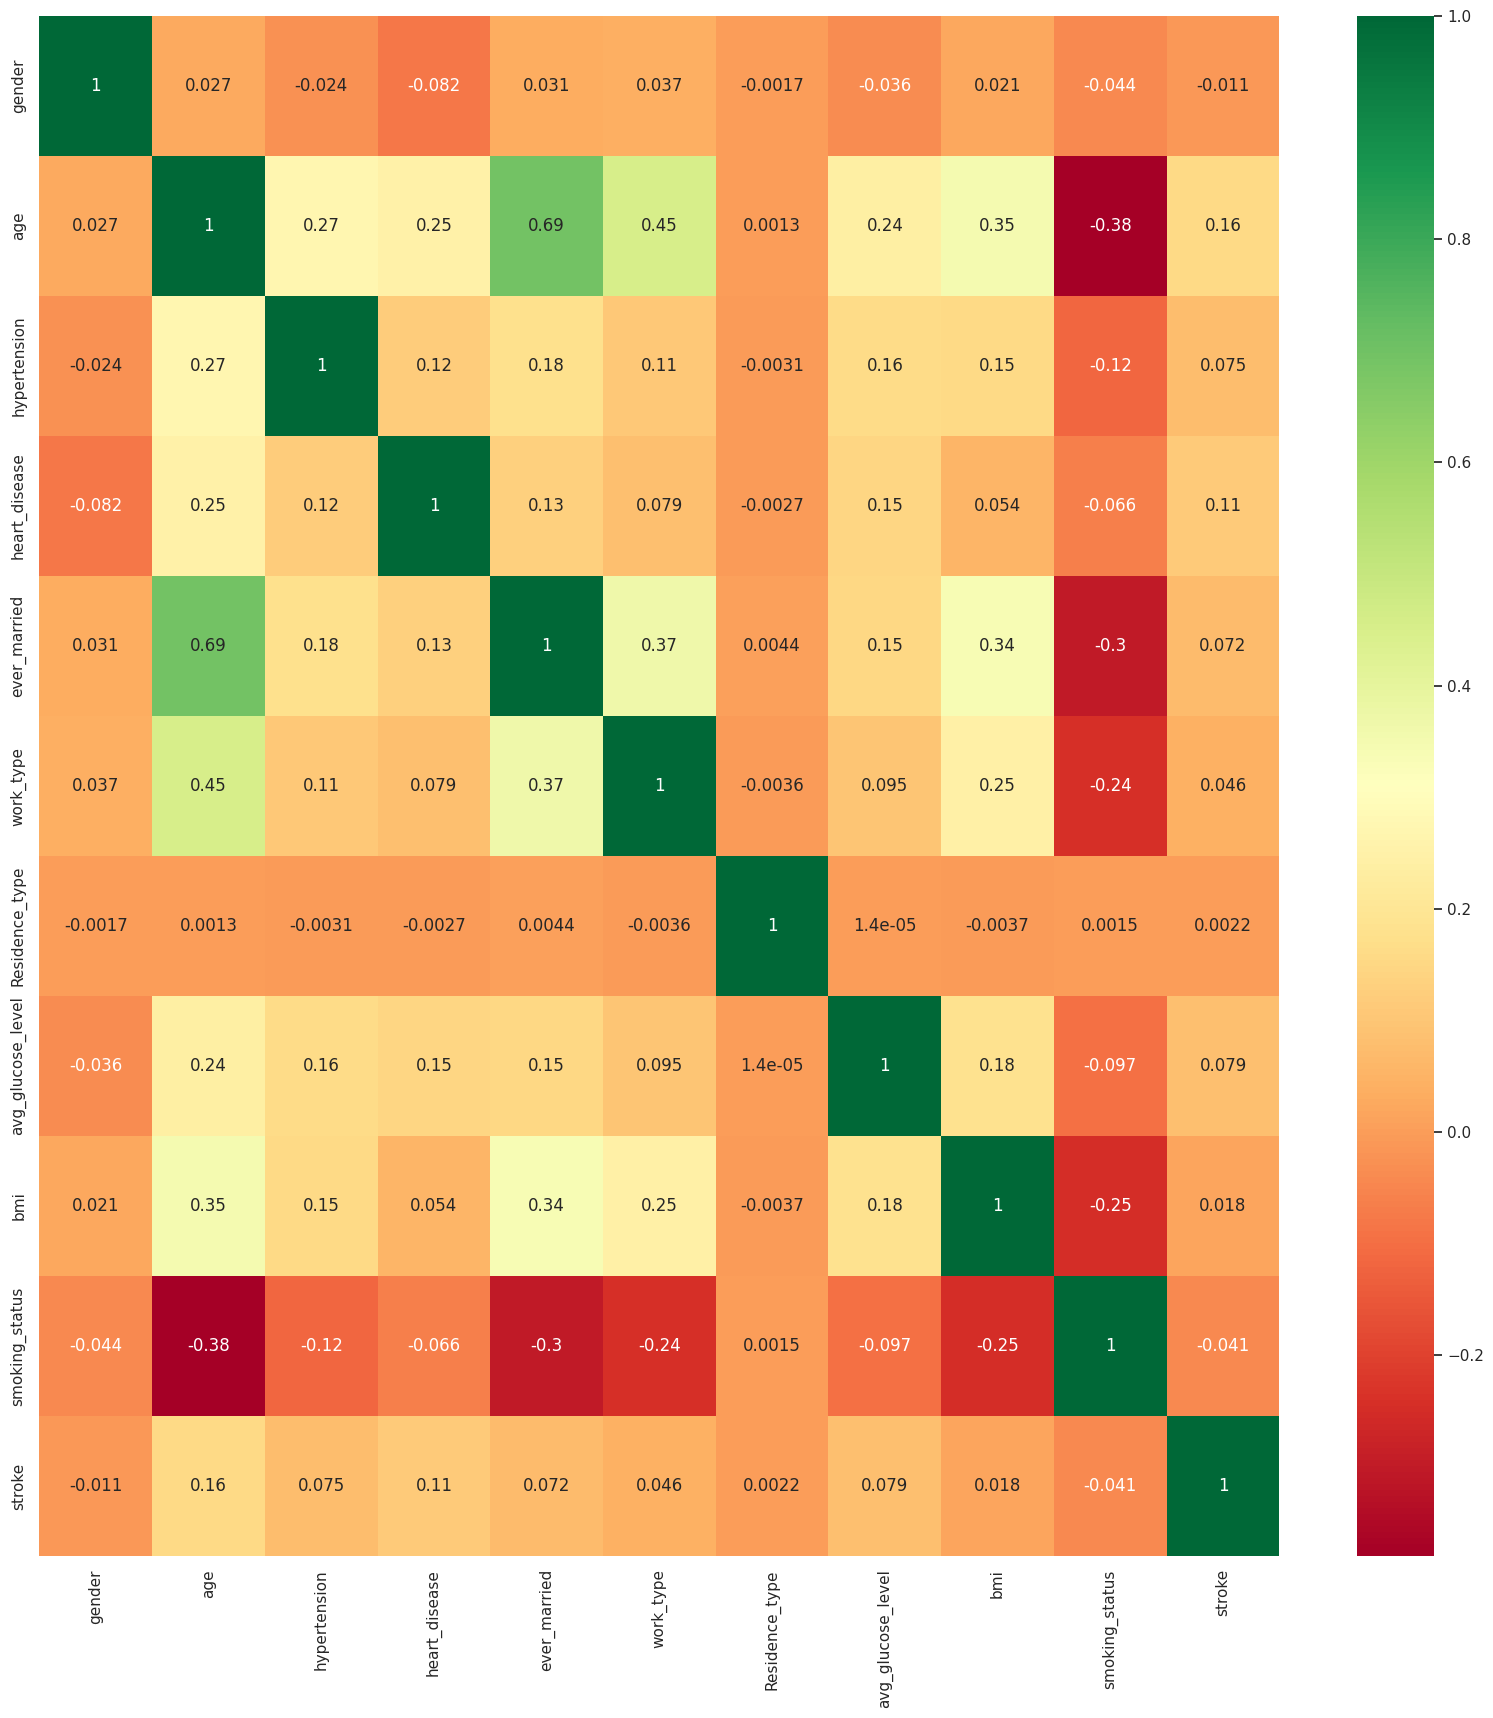

In [ ]:
#get correlations of each features in dataset
corrmat = brain_dataset1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(brain_dataset1[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [ ]:
brain_dataset1.corr()['stroke'].nlargest(9)

stroke               1.000000
age                  0.156049
heart_disease        0.113763
avg_glucose_level    0.078917
hypertension         0.075332
ever_married         0.071920
work_type            0.045946
bmi                  0.018407
Residence_type       0.002247
Name: stroke, dtype: float64

In [ ]:

top_features = brain_dataset1.corr()['stroke'].nlargest(9).index
X = brain_dataset1[top_features]
X=X.drop('stroke', axis=1)


In [ ]:
X

,age,heart_disease,avg_glucose_level,hypertension,ever_married,work_type,bmi,Residence_type
0,3.0,0,95.12,0,0.0,0.0,18.0,0.0
1,58.0,0,87.96,1,1.0,1.0,39.2,1.0
2,8.0,0,110.89,0,0.0,1.0,17.6,1.0
3,70.0,0,69.04,0,1.0,1.0,35.9,0.0
4,14.0,0,161.28,0,0.0,2.0,19.1,0.0
...,...,...,...,...,...,...,...,...
43395,10.0,0,58.64,0,0.0,0.0,20.4,1.0
43396,56.0,0,213.61,0,1.0,4.0,55.4,1.0
43397,82.0,0,91.94,1,1.0,1.0,28.9,1.0
43398,40.0,0,99.16,0,1.0,1.0,33.2,1.0


**Data Visualisation**

**1. Histogram for Numeric Columns (e.g., Age, Avg Glucose Level, BMI)**

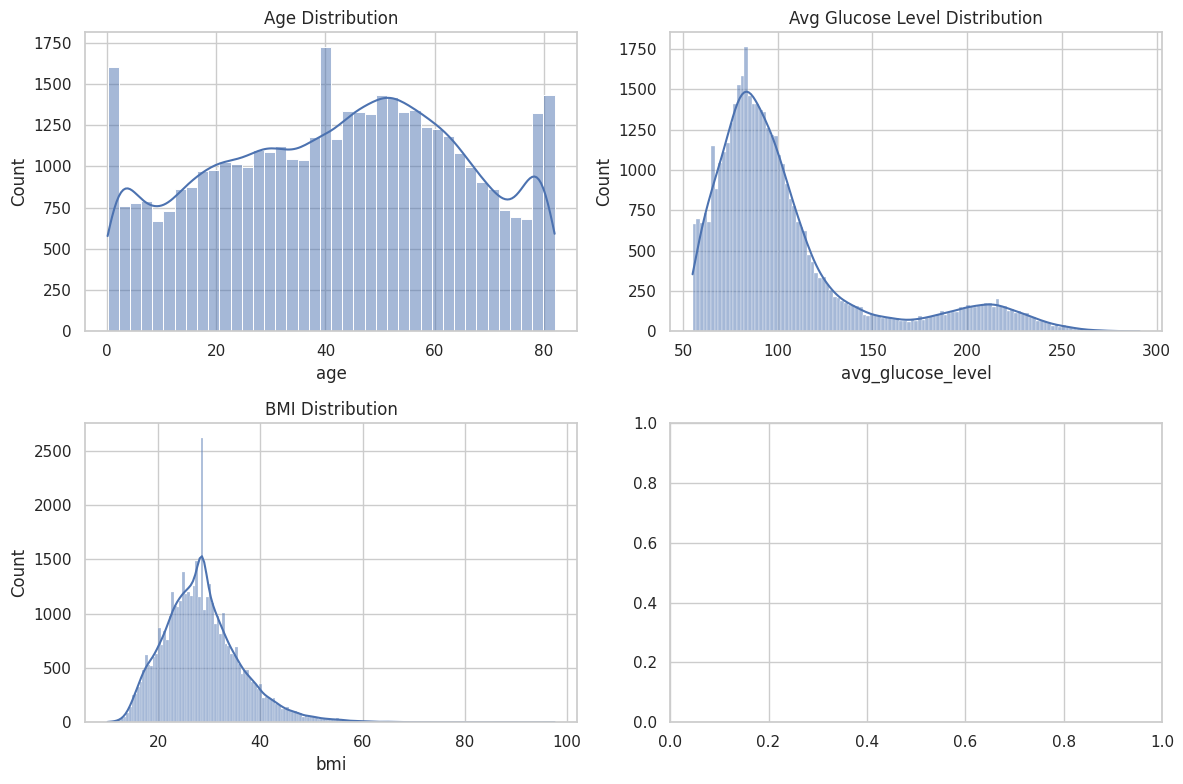

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms
sns.histplot(brain_dataset1['age'], kde=True, ax=axes[0, 0]).set_title('Age Distribution')
sns.histplot(brain_dataset1['avg_glucose_level'], kde=True, ax=axes[0, 1]).set_title('Avg Glucose Level Distribution')
sns.histplot(brain_dataset1['bmi'], kde=True, ax=axes[1, 0]).set_title('BMI Distribution')

# Show the plot
plt.tight_layout()
plt.show()


**2. Countplot for Categorical Columns (e.g., Gender, Work Type, Smoking Status)**

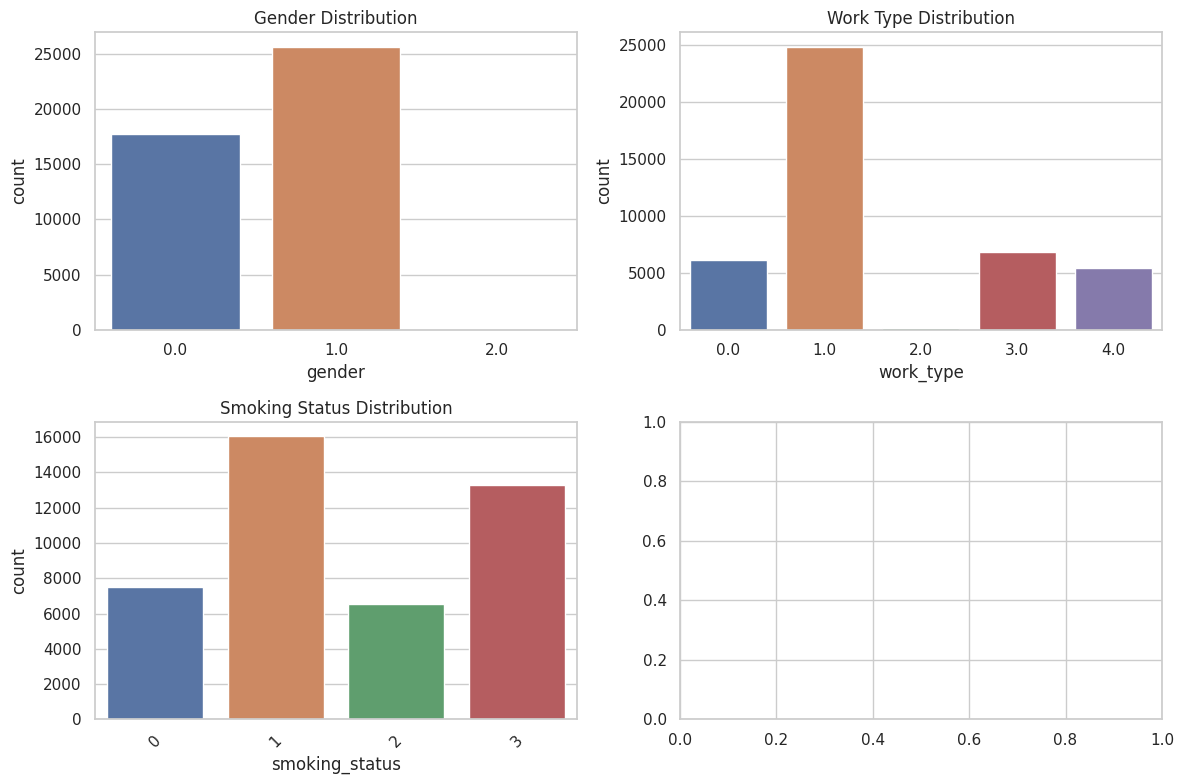

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot countplots
sns.countplot(x='gender', data=brain_dataset1, ax=axes[0, 0]).set_title('Gender Distribution')
sns.countplot(x='work_type', data=brain_dataset1, ax=axes[0, 1]).set_title('Work Type Distribution')
sns.countplot(x='smoking_status', data=brain_dataset1, ax=axes[1, 0]).set_title('Smoking Status Distribution')

# Rotate x-axis labels for better readability
axes[1, 0].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


**3. Boxplot for Numeric Columns vs. Categorical Columns (e.g., Age vs. Gender, Avg Glucose Level vs. Work Type)**

Text(0.5, 1.0, 'Age vs. Gender')

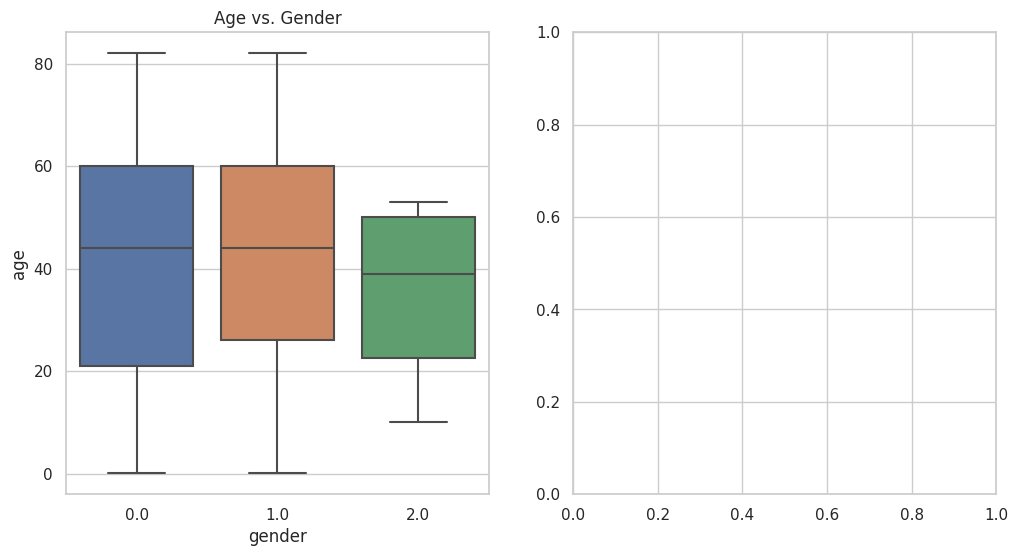

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot boxplots
sns.boxplot(x='gender', y='age', data=brain_dataset1, ax=axes[0]).set_title('Age vs. Gender')


**Scatter Plot:**

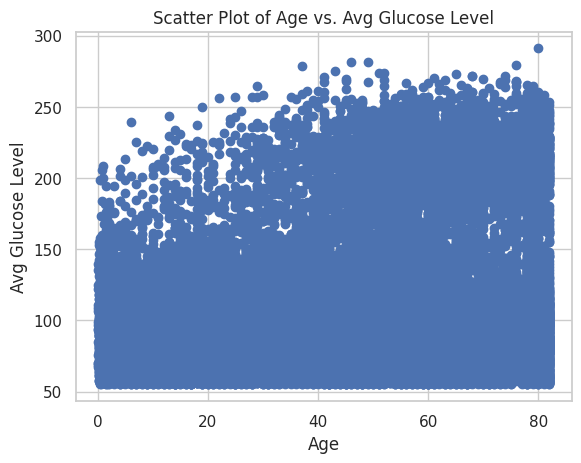

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for age vs. avg_glucose_level
plt.scatter(brain_dataset1['age'], brain_dataset1['avg_glucose_level'])
plt.title('Scatter Plot of Age vs. Avg Glucose Level')
plt.xlabel('Age')
plt.ylabel('Avg Glucose Level')
plt.show()


**Bar Chart:**

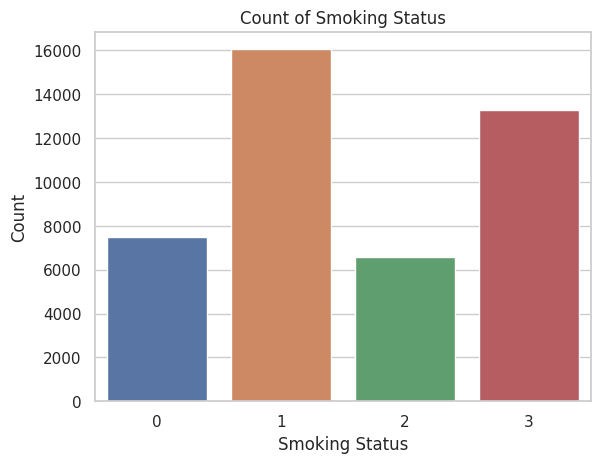

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for count of smoking status
sns.countplot(x='smoking_status', data=brain_dataset1)
plt.title('Count of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()


**Pie Chart:**

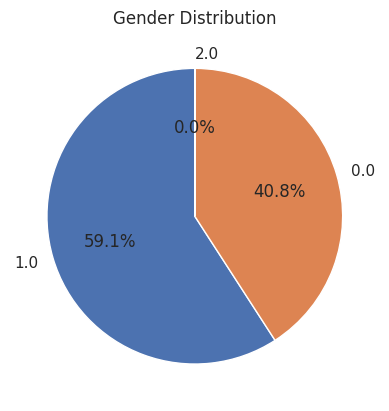

In [ ]:
# Pie chart for gender distribution
gender_counts = brain_dataset1['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()


**Outlier remove**

<ipython-input-265-144212431a89>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(brain_dataset1['age'])


<Axes: >

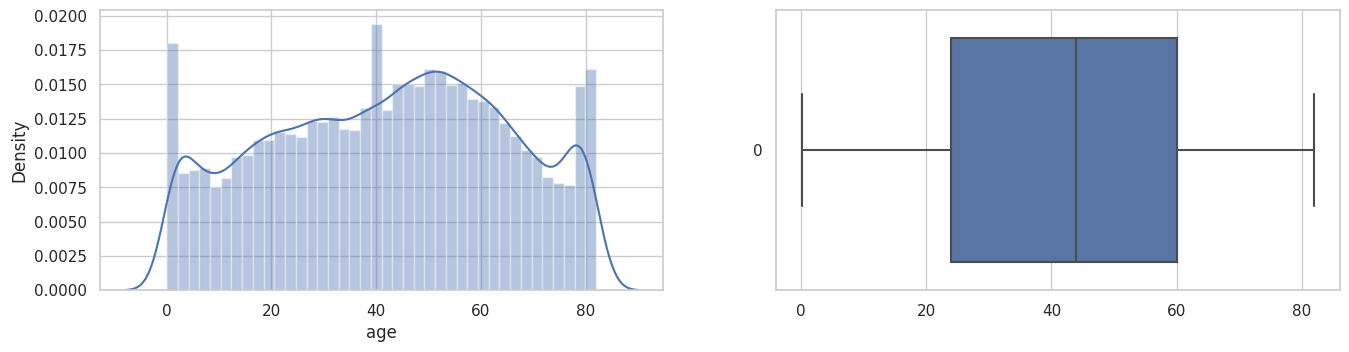

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(brain_dataset1['age'])

plt.subplot(2,2,2)
sns.boxplot(brain_dataset1['age'], orient='h')


<ipython-input-266-1d1c00f187e5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(brain_dataset1['avg_glucose_level'])


<Axes: >

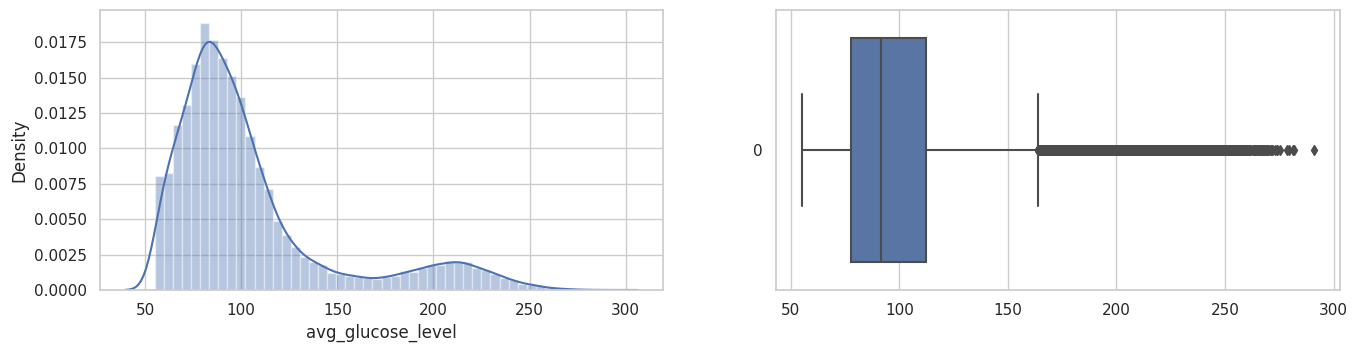

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(brain_dataset1['avg_glucose_level'])

plt.subplot(2,2,2)
sns.boxplot(brain_dataset1['avg_glucose_level'], orient='h')

In [ ]:
brain_dataset1['avg_glucose_level'].describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: avg_glucose_level, dtype: float64

In [ ]:
# outlier in avg_glucose_level colunm
percentile25 = brain_dataset1['avg_glucose_level'].quantile(0.25)
percentile75 = brain_dataset1['avg_glucose_level'].quantile(0.75)

iqr=percentile75-percentile25
print("IQR: ",iqr)

upper_limit_glu = percentile75 + 1.5 * iqr
lower_limit_glu = percentile25 - 1.5 * iqr

print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

IQR:  34.52999999999999
upper limit:  46.400000000000006
lower limit:  9.599999999999994


In [ ]:
outlier_gl= brain_dataset1[(brain_dataset1['avg_glucose_level']>upper_limit) |
         (brain_dataset1['avg_glucose_level']<lower_limit)]
outlier_gl.shape

(43400, 11)

In [ ]:
df_new = brain_dataset1.copy()
df_new['avg_glucose_level'] = np.where(
    df_new['avg_glucose_level'] > upper_limit_glu,
    upper_limit_glu,
    np.where(
       df_new['avg_glucose_level'] < lower_limit_glu,
        lower_limit_glu,
        df_new['avg_glucose_level']
    )
)
df_new.shape

(43400, 11)

<ipython-input-271-b1b33132d786>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(brain_dataset1['avg_glucose_level'])
<ipython-input-271-b1b33132d786>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['avg_glucose_level'])


<Axes: >

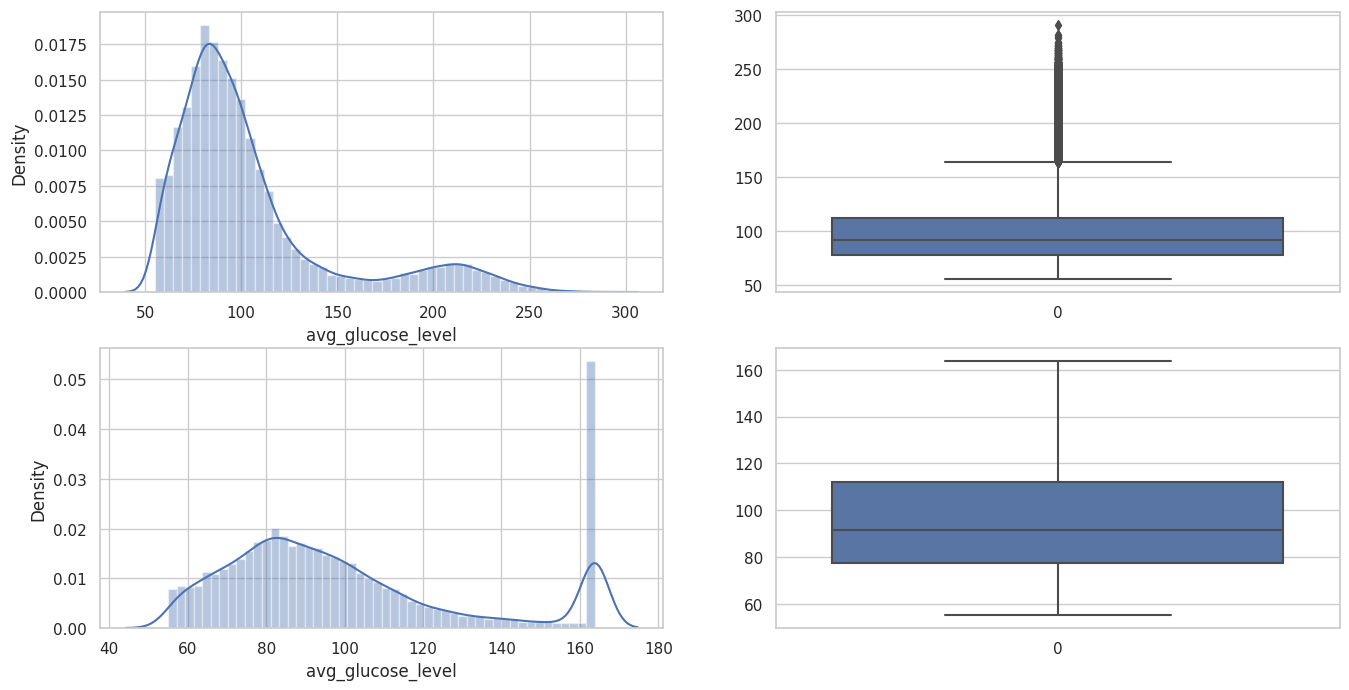

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(brain_dataset1['avg_glucose_level'])

plt.subplot(2,2,2)
sns.boxplot(brain_dataset1['avg_glucose_level'])

plt.subplot(2,2,3)
sns.distplot(df_new['avg_glucose_level'])

plt.subplot(2,2,4)
sns.boxplot(df_new['avg_glucose_level'])

<ipython-input-272-b28a5bb4d7c0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(brain_dataset1['bmi'])


<Axes: >

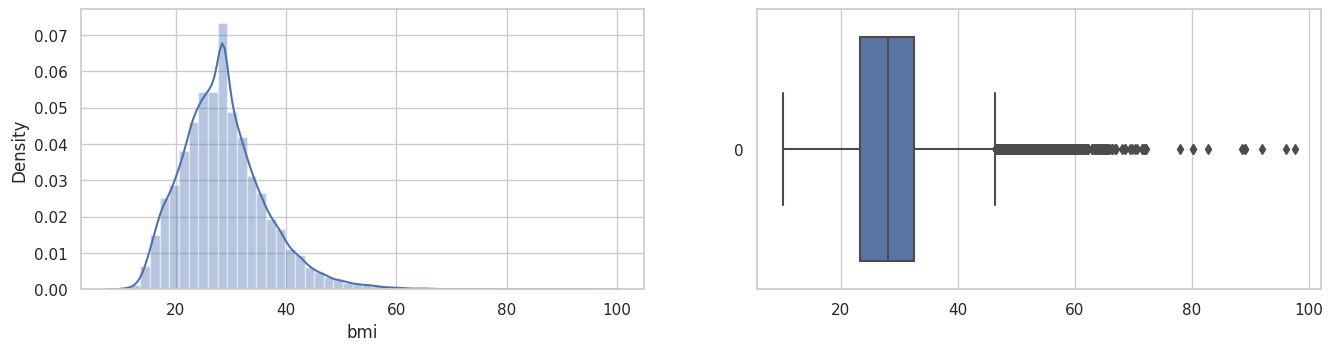

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(brain_dataset1['bmi'])

plt.subplot(2,2,2)
sns.boxplot(brain_dataset1['bmi'], orient='h')

In [ ]:
# outlier in avg_glucose_level colunm
percentile25 = brain_dataset1['bmi'].quantile(0.25)
percentile75 = brain_dataset1['bmi'].quantile(0.75)

iqr=percentile75-percentile25
print("IQR: ",iqr)

upper_limit_bmi = percentile75 + 1.5 * iqr
lower_limit_bmi = percentile25 - 1.5 * iqr

print("upper limit: ",upper_limit_bmi)
print("lower limit: ",lower_limit_bmi)

IQR:  9.200000000000003
upper limit:  46.400000000000006
lower limit:  9.599999999999994


In [ ]:
outlier_bmi= brain_dataset1[(brain_dataset1['bmi']>upper_limit_bmi) |
         (brain_dataset1['bmi']<lower_limit_bmi)]
outlier_bmi.shape

(1084, 11)

In [ ]:
df_new = brain_dataset1.copy()
df_new['bmi'] = np.where(
    df_new['bmi'] > upper_limit_bmi,
    upper_limit_bmi,
    np.where(
       df_new['bmi'] < lower_limit_bmi,
        lower_limit_bmi,
        df_new['bmi']
    )
)
df_new.shape

(43400, 11)

<ipython-input-276-ea8d264de9ca>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(brain_dataset1['bmi'])
<ipython-input-276-ea8d264de9ca>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['bmi'])


<Axes: >

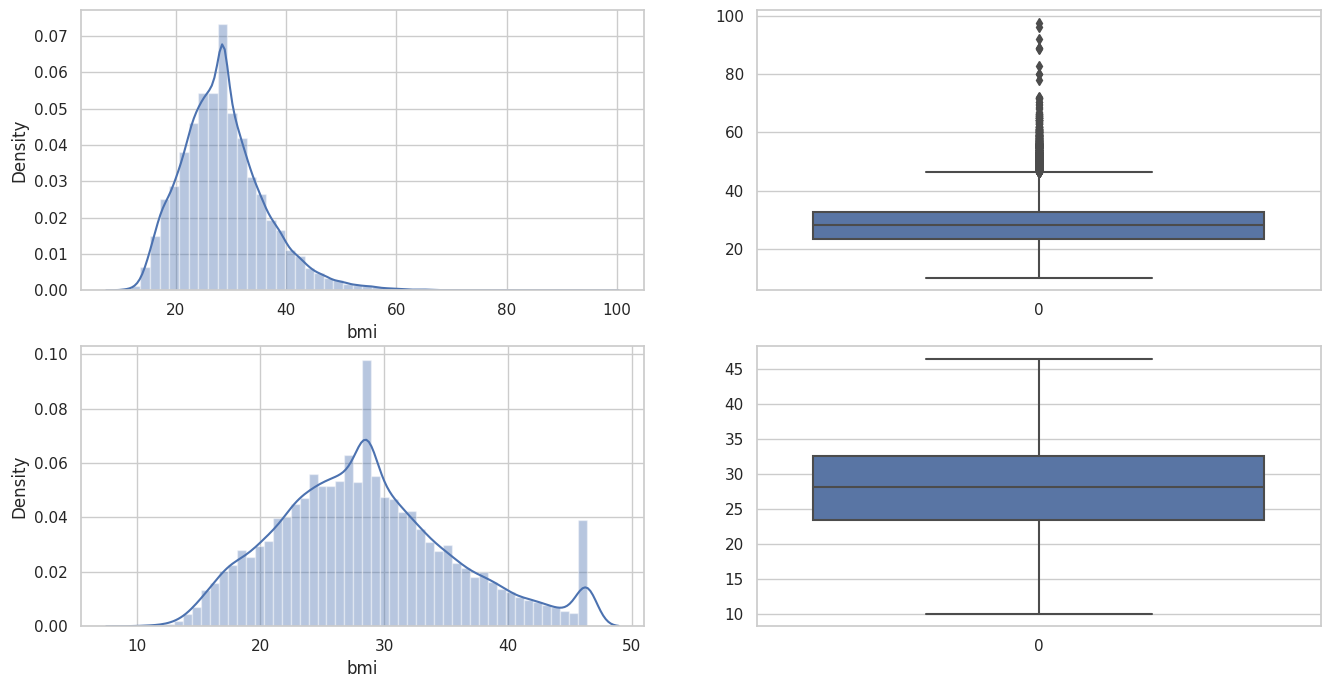

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(brain_dataset1['bmi'])

plt.subplot(2,2,2)
sns.boxplot(brain_dataset1['bmi'])

plt.subplot(2,2,3)
sns.distplot(df_new['bmi'])

plt.subplot(2,2,4)
sns.boxplot(df_new['bmi'])

seperating the Data and Model

In [ ]:
#seperating the data and models
X = df_new.drop(columns = "stroke" , axis=1)
Y = df_new["stroke"]


In [ ]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.0,3.0,0,0,0.0,0.0,0.0,95.12,18.0,3
1,0.0,58.0,1,0,1.0,1.0,1.0,87.96,39.2,1
2,1.0,8.0,0,0,0.0,1.0,1.0,110.89,17.6,3
3,1.0,70.0,0,0,1.0,1.0,0.0,69.04,35.9,0
4,0.0,14.0,0,0,0.0,2.0,0.0,161.28,19.1,3
...,...,...,...,...,...,...,...,...,...,...
43395,1.0,10.0,0,0,0.0,0.0,1.0,58.64,20.4,1
43396,1.0,56.0,0,0,1.0,4.0,1.0,213.61,46.4,0
43397,1.0,82.0,1,0,1.0,1.0,1.0,91.94,28.9,0
43398,0.0,40.0,0,0,1.0,1.0,1.0,99.16,33.2,1


In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 43400, dtype: int64

In [ ]:
Y.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

**Scaling**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardied_data = scaler.transform(X)

In [ ]:

standardied_data

array([[-1.20297175, -1.74151677, -0.32129564, ..., -0.21717647,
        -1.45679365,  1.28640708],
       [-1.20297175,  0.700823  ,  3.11239826, ..., -0.38325839,
         1.49481238, -0.53968634],
       [ 0.82953395, -1.51948588, -0.32129564, ...,  0.14862128,
        -1.51248433,  1.28640708],
       ...,
       [ 0.82953395,  1.76657127,  3.11239826, ..., -0.29093911,
         0.06077737, -1.45273305],
       [-1.20297175, -0.0984882 , -0.32129564, ..., -0.12346544,
         0.65945218, -0.53968634],
       [ 0.82953395,  1.76657127, -0.32129564, ..., -0.57995877,
        -1.09480423, -0.53968634]])

In [ ]:
X = standardied_data

In [ ]:
X

array([[-1.20297175, -1.74151677, -0.32129564, ..., -0.21717647,
        -1.45679365,  1.28640708],
       [-1.20297175,  0.700823  ,  3.11239826, ..., -0.38325839,
         1.49481238, -0.53968634],
       [ 0.82953395, -1.51948588, -0.32129564, ...,  0.14862128,
        -1.51248433,  1.28640708],
       ...,
       [ 0.82953395,  1.76657127,  3.11239826, ..., -0.29093911,
         0.06077737, -1.45273305],
       [-1.20297175, -0.0984882 , -0.32129564, ..., -0.12346544,
         0.65945218, -0.53968634],
       [ 0.82953395,  1.76657127, -0.32129564, ..., -0.57995877,
        -1.09480423, -0.53968634]])

**PCA**

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6'])
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.118442,1.258308,0.978320,-0.424474,-0.329614,0.118999
1,1.852356,1.117177,-0.977341,0.365358,-1.734099,2.460736
2,-2.614427,0.090481,-0.954979,1.025091,0.598948,-0.177365
3,1.399268,-1.459247,0.999990,-0.158413,0.118888,0.101474
4,-1.888978,1.519493,0.987836,-0.120326,-0.575571,-0.815382
...,...,...,...,...,...,...
43395,-2.381525,-0.670202,-0.957857,0.478767,0.532622,0.501483
43396,3.215152,-0.745388,-0.957124,1.022296,-1.147428,-2.228993
43397,2.255658,-0.051355,-0.930360,1.585690,-0.275605,2.638327
43398,0.384381,0.214039,-1.050369,-1.001622,-0.885658,-0.186844


**Visualization of PCA**

In [ ]:
finalDf = pd.concat([X_pca, df_new[['stroke']]], axis = 1)


In [ ]:
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,stroke
0,-3.118442,1.258308,0.978320,-0.424474,-0.329614,0.118999,0
1,1.852356,1.117177,-0.977341,0.365358,-1.734099,2.460736,0
2,-2.614427,0.090481,-0.954979,1.025091,0.598948,-0.177365,0
3,1.399268,-1.459247,0.999990,-0.158413,0.118888,0.101474,0
4,-1.888978,1.519493,0.987836,-0.120326,-0.575571,-0.815382,0
...,...,...,...,...,...,...,...
43395,-2.381525,-0.670202,-0.957857,0.478767,0.532622,0.501483,0
43396,3.215152,-0.745388,-0.957124,1.022296,-1.147428,-2.228993,0
43397,2.255658,-0.051355,-0.930360,1.585690,-0.275605,2.638327,0
43398,0.384381,0.214039,-1.050369,-1.001622,-0.885658,-0.186844,0


In [ ]:
y.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

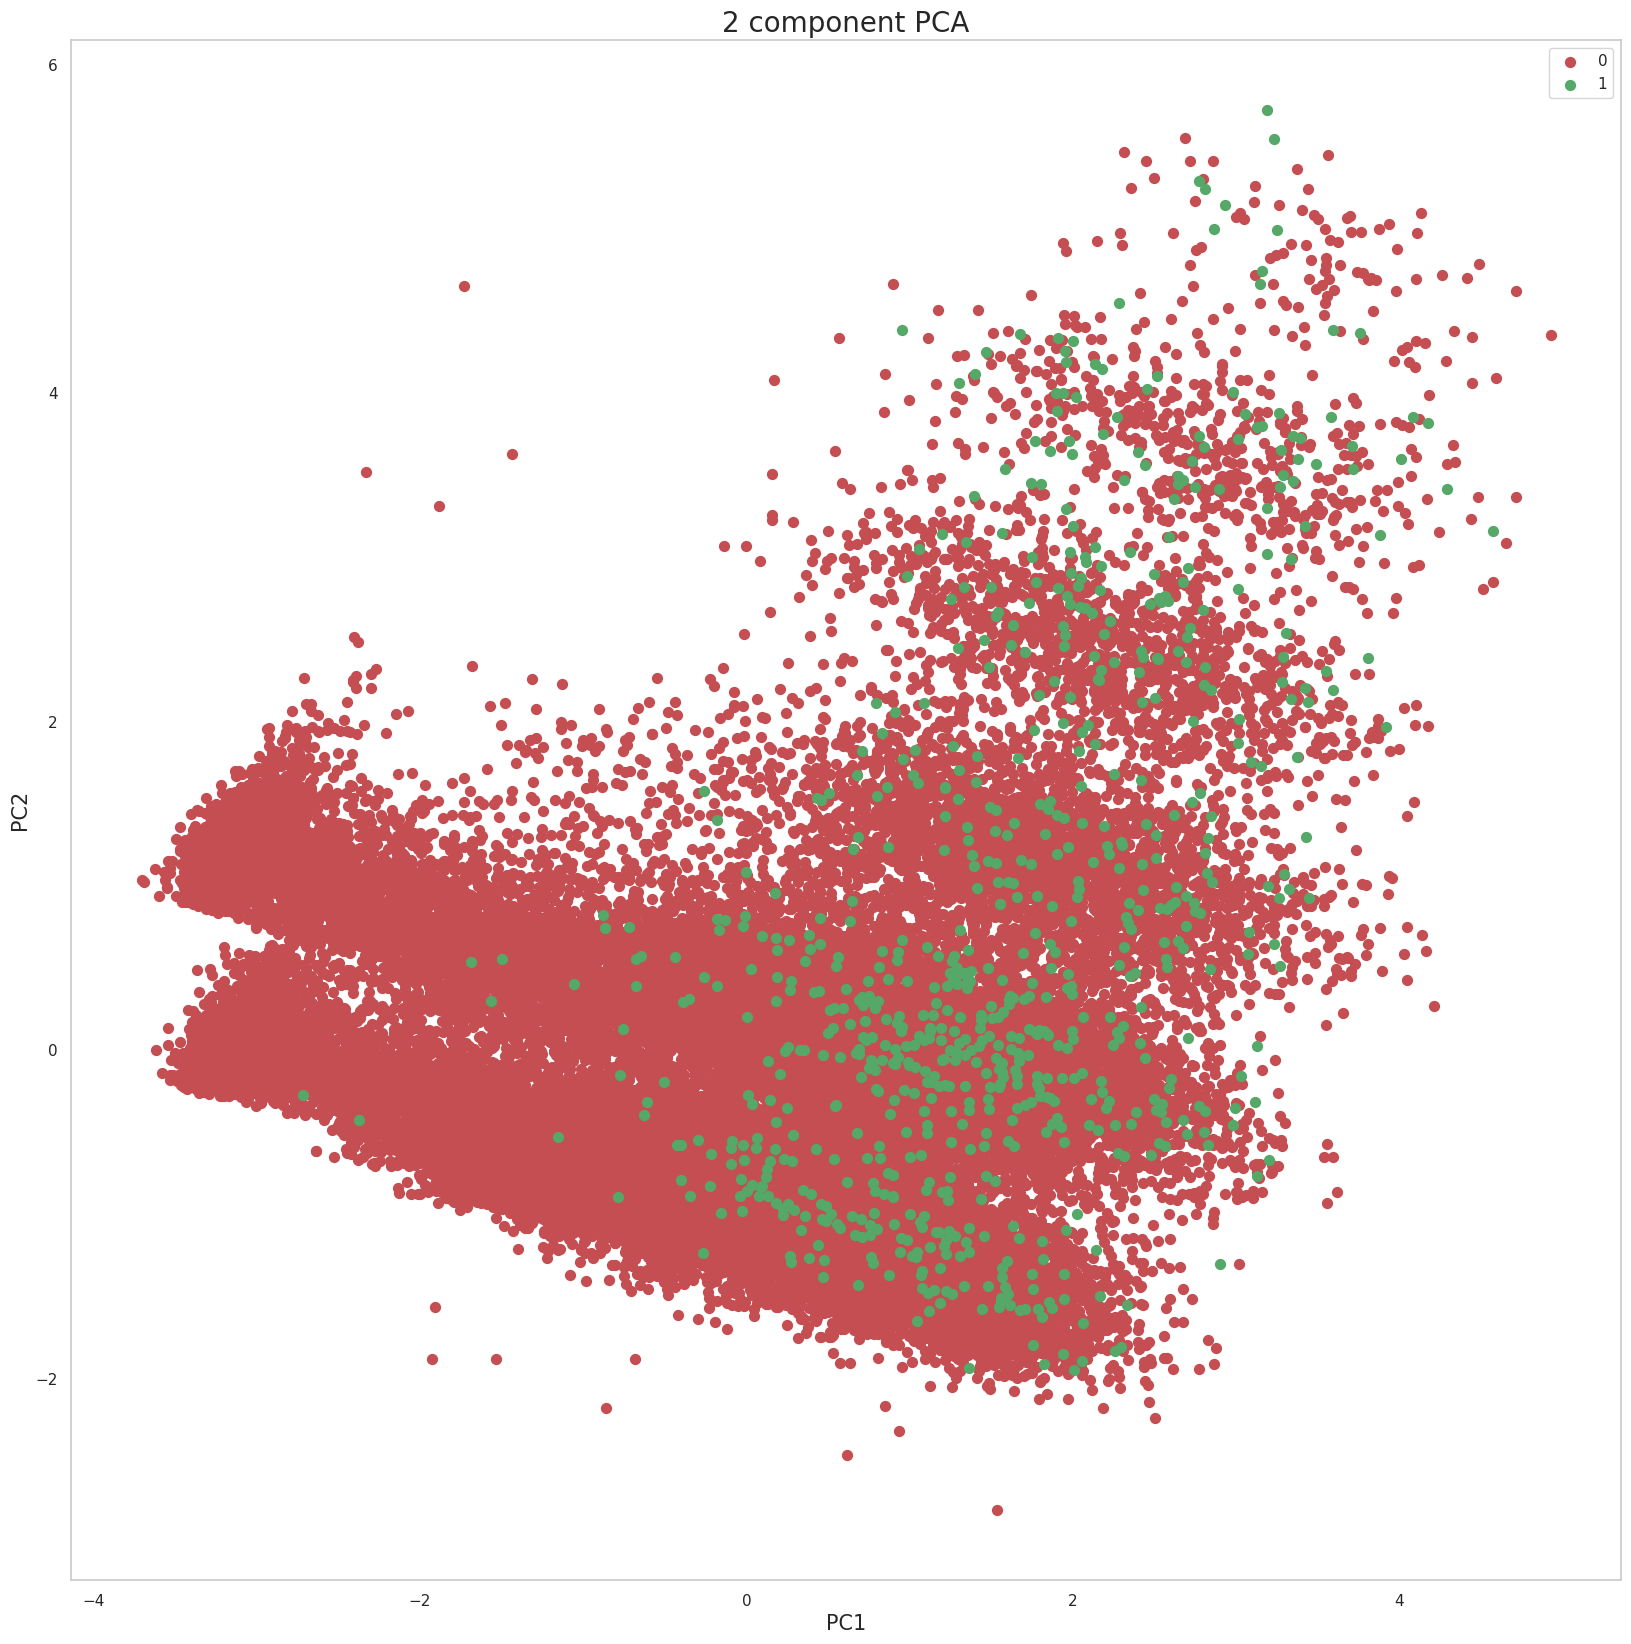

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stroke'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

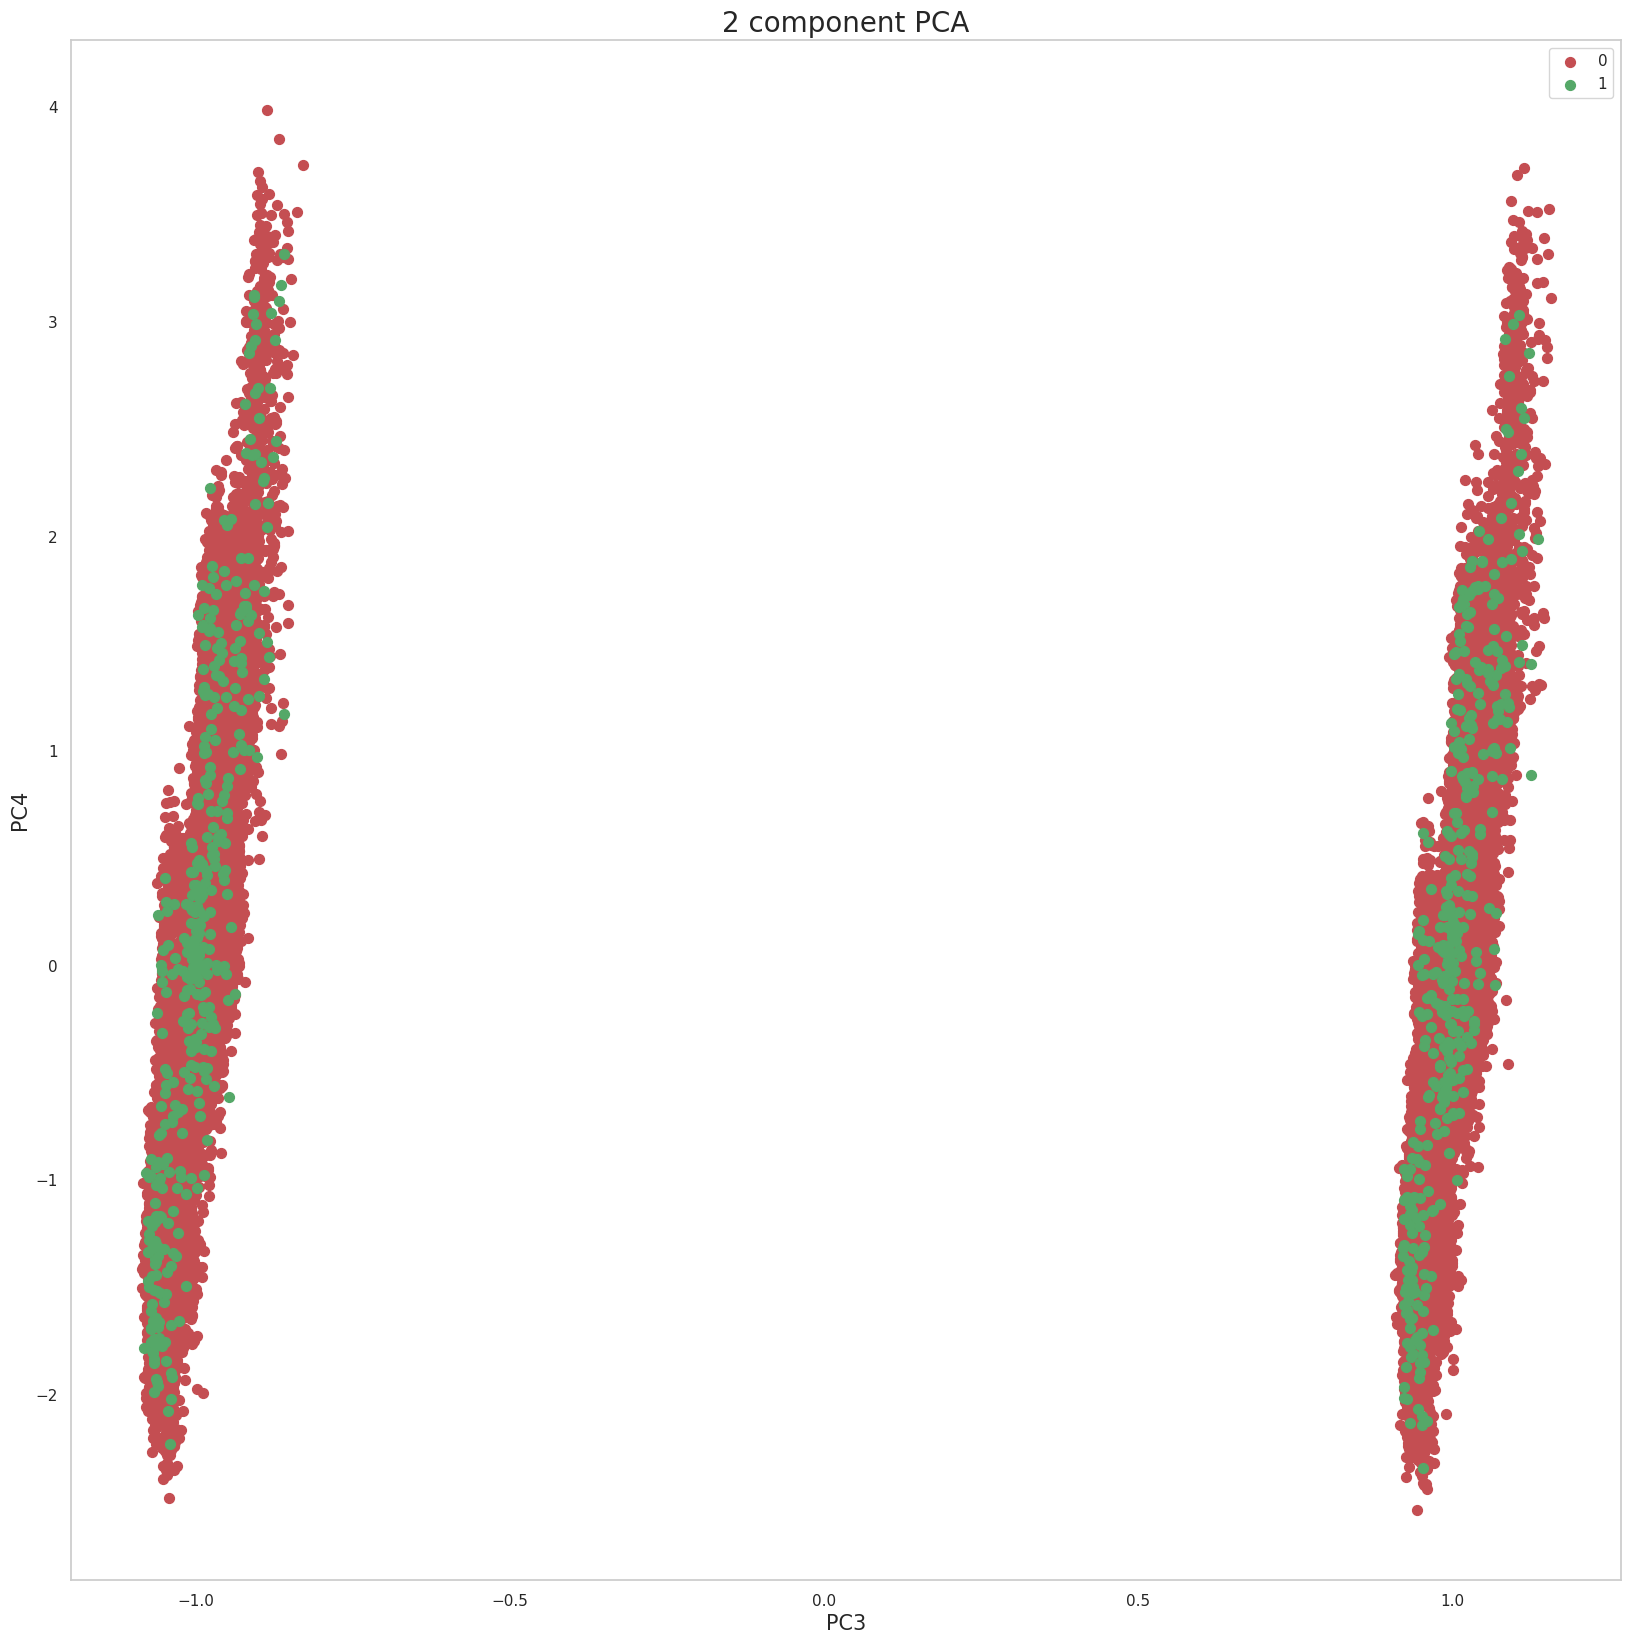

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC3', fontsize = 15)
ax.set_ylabel('PC4', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stroke'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC3']
               , finalDf.loc[indicesToKeep, 'PC4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()




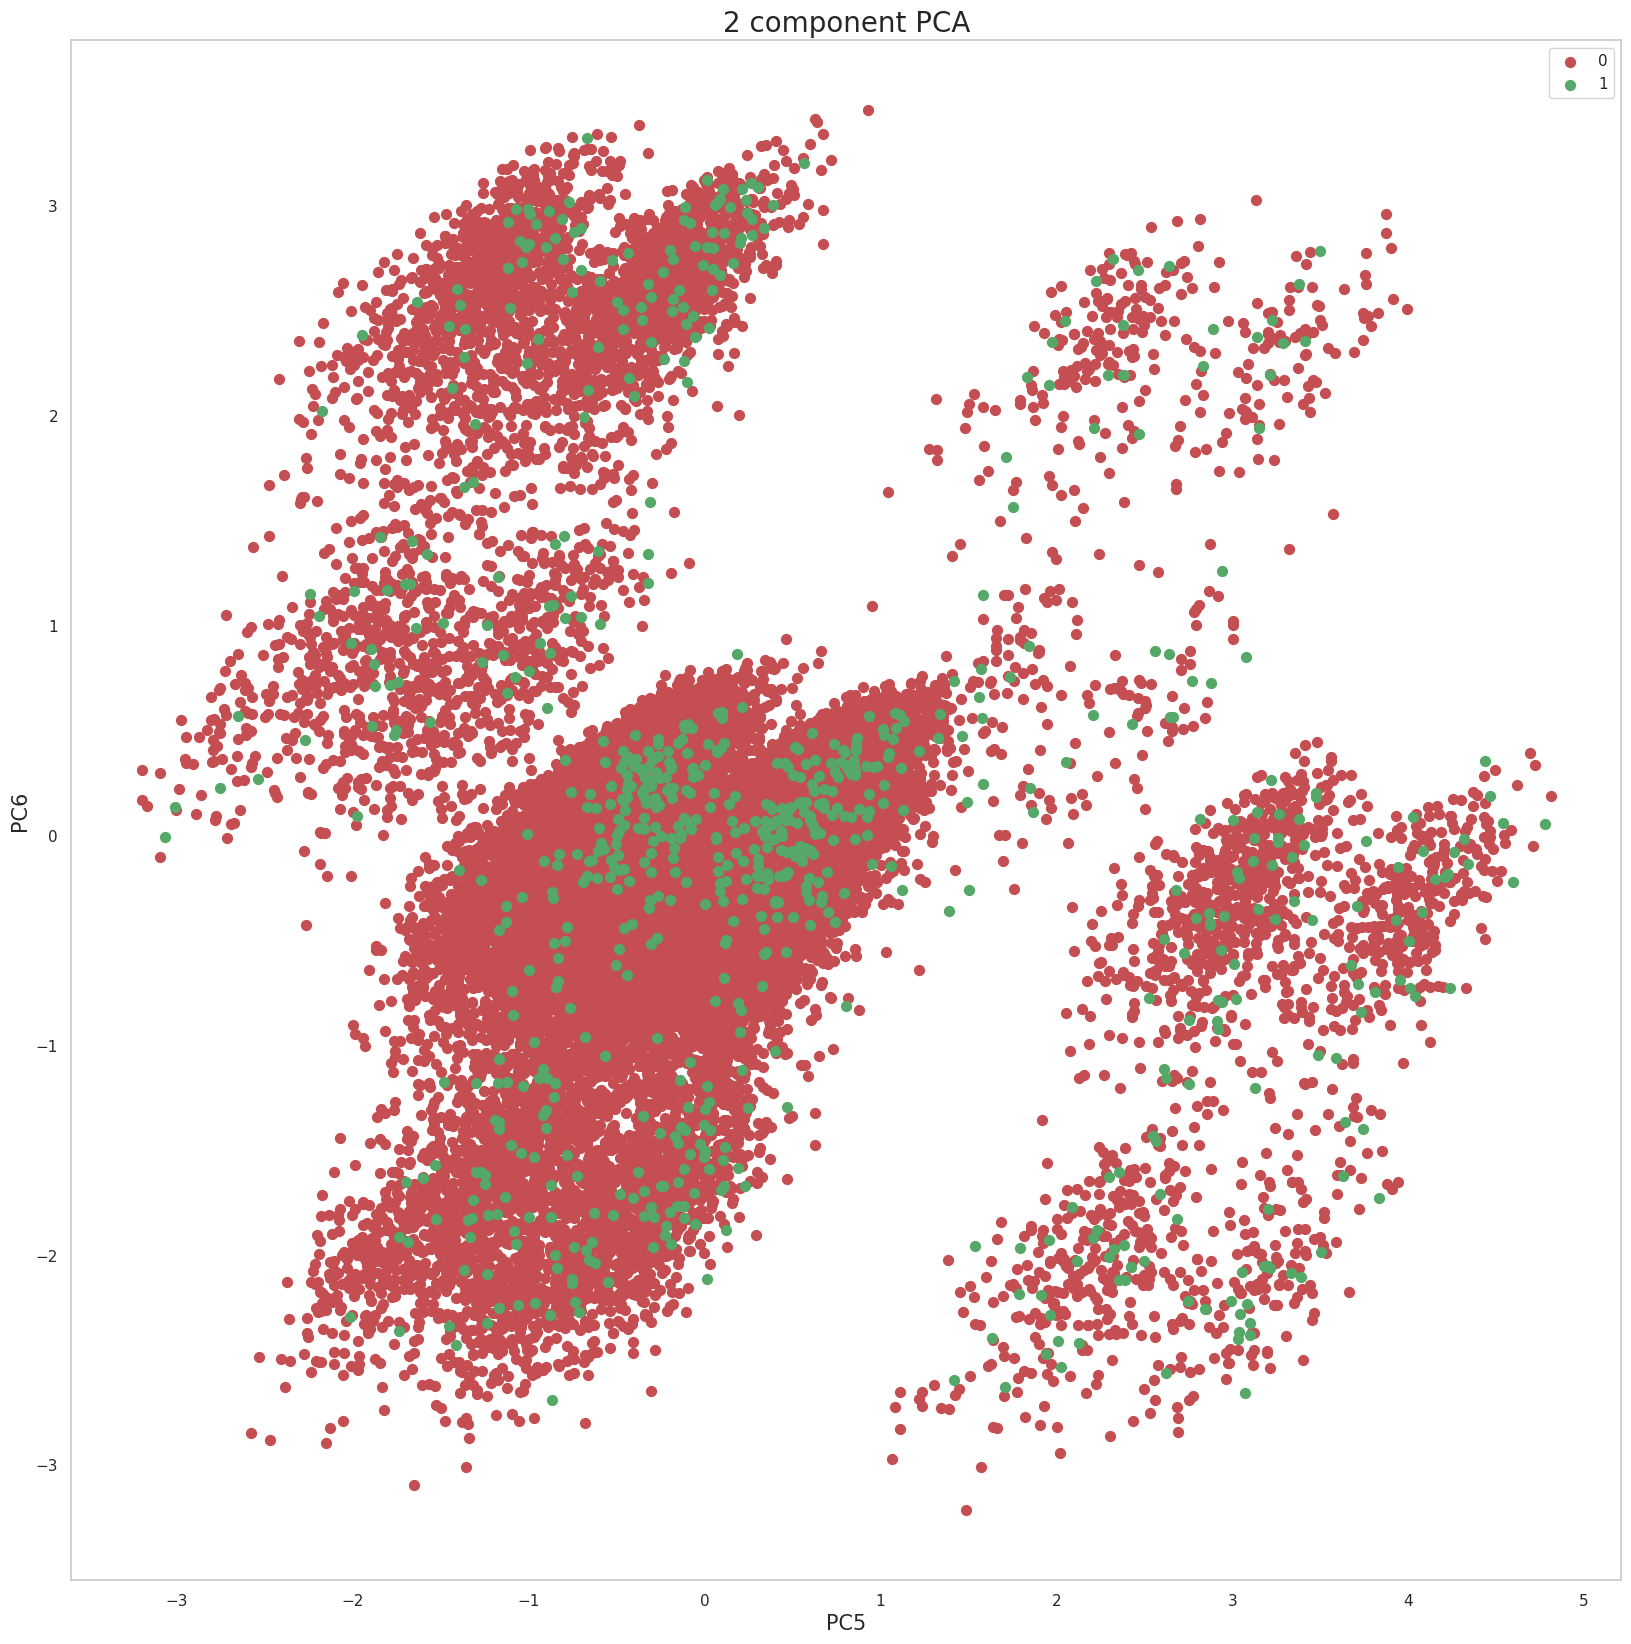

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC5', fontsize = 15)
ax.set_ylabel('PC6', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stroke'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC5']
               , finalDf.loc[indicesToKeep, 'PC6']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**ML Models**

**1.Logistic Regression**

**Train Test Split**

In [ ]:
X = finalDf.drop(columns = "stroke" , axis=1)
Y = finalDf["stroke"]


In [ ]:
X

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.118442,1.258308,0.978320,-0.424474,-0.329614,0.118999
1,1.852356,1.117177,-0.977341,0.365358,-1.734099,2.460736
2,-2.614427,0.090481,-0.954979,1.025091,0.598948,-0.177365
3,1.399268,-1.459247,0.999990,-0.158413,0.118888,0.101474
4,-1.888978,1.519493,0.987836,-0.120326,-0.575571,-0.815382
...,...,...,...,...,...,...
43395,-2.381525,-0.670202,-0.957857,0.478767,0.532622,0.501483
43396,3.215152,-0.745388,-0.957124,1.022296,-1.147428,-2.228993
43397,2.255658,-0.051355,-0.930360,1.585690,-0.275605,2.638327
43398,0.384381,0.214039,-1.050369,-1.001622,-0.885658,-0.186844


In [ ]:
finalDf['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
logmodel.score(xtest,ytest)

0.9824116743471583

In [ ]:
predictions = logmodel.predict(xtest)

In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:

ytest.shape


(13020,)

In [ ]:
xtest.shape

(13020, 6)

In [ ]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12791
           1       0.00      0.00      0.00       229

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_log=(confusion_matrix(ytest,predictions))

In [ ]:
confusion_log

array([[12791,     0],
       [  229,     0]])

In [ ]:

acc_log=logmodel.score(xtest,ytest)

In [ ]:
acc_log

0.9824116743471583

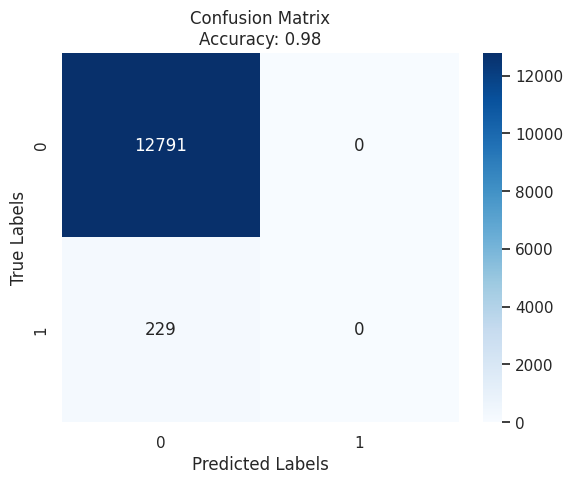

In [ ]:
# Plot confusion matrix as a heatmap
sns.heatmap(confusion_log, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix\nAccuracy: {acc_log:.2f}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**2.Gaussian-Naive-Bayes**


**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
pred = gnb.predict(X_test)

In [ ]:

print(gnb.score(X_test,y_test))

0.936405529953917


In [ ]:
gnb2 = GaussianNB()
gnb2.fit(X_train,y_train)

GaussianNB()

In [ ]:
print(gnb2.score(X_test,y_test))

0.936405529953917


Prediction and Evalutions

In [ ]:

from sklearn.metrics import classification_report,confusion_matrix
confusion_NV=(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     12791
           1       0.07      0.21      0.10       229

    accuracy                           0.94     13020
   macro avg       0.53      0.58      0.54     13020
weighted avg       0.97      0.94      0.95     13020



In [ ]:
confusion_NV

array([[12144,   647],
       [  181,    48]])

In [ ]:

acc_NV=gnb.score(X_test,y_test)

In [ ]:
acc_NV

0.936405529953917

**3.Decesion Tree**

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.3 , random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:

predictions = dtc.predict(xtest)

In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12791
           1       0.06      0.07      0.07       229

    accuracy                           0.96     13020
   macro avg       0.52      0.53      0.52     13020
weighted avg       0.97      0.96      0.97     13020



In [ ]:
confusion_DT=(confusion_matrix(ytest,predictions))

In [ ]:
confusion_DT

array([[12529,   262],
       [  212,    17]])

In [ ]:
acc_DT=dtc.score(xtest,ytest)

In [ ]:
acc_DT

0.9635944700460829

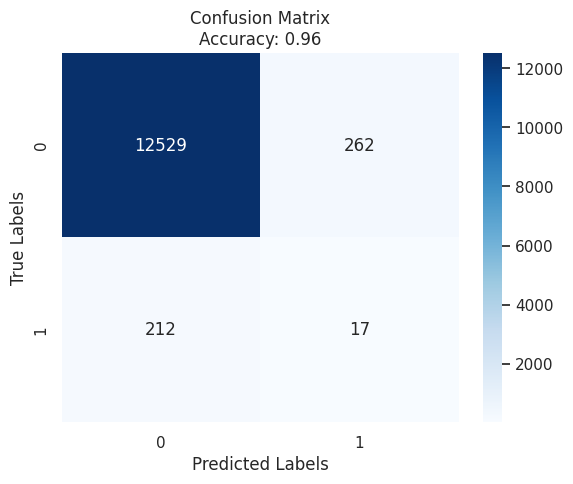

In [ ]:
# Plot confusion matrix as a heatmap
sns.heatmap(confusion_DT, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix\nAccuracy: {acc_DT:.2f}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Tree Visualization**

In [ ]:

import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [ ]:
# Assuming features is a list of feature names with the correct number of features
features = ['avg_glucose_level', 'bmi', 'age', 'Residence_type_Urban', 'gender_Male', 'hypertension', 'smoking_status_never smoked', 'heart_disease', 'ever_married_Yes', 'smoking_status_smokes']

# Create a decision tree classifier (replace this line with your actual model creation)
dtc = DecisionTreeClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
from IPython.display import Image
from io import StringIO  # Import StringIO from the io module
from sklearn.tree import export_graphviz
import pydot


features = list(finalDf.columns[:-1])
features

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

In [ ]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

**4.SVM-Support-Vector-Machine-**


**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=.3,random_state=1)

In [ ]:

from sklearn.svm import SVC
sv=SVC(kernel='linear')
sv.fit(xtrain,ytrain)

SVC(kernel='linear')

In [ ]:

predictions = sv.predict(xtest)

In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(ytest,predictions))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12791
           1       0.00      0.00      0.00       229

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_SVC=(confusion_matrix(ytest,predictions))

In [ ]:
confusion_SVC

array([[12791,     0],
       [  229,     0]])

In [ ]:
acc_SVC=sv.score(xtest,ytest)

In [ ]:
acc_SVC

0.9824116743471583

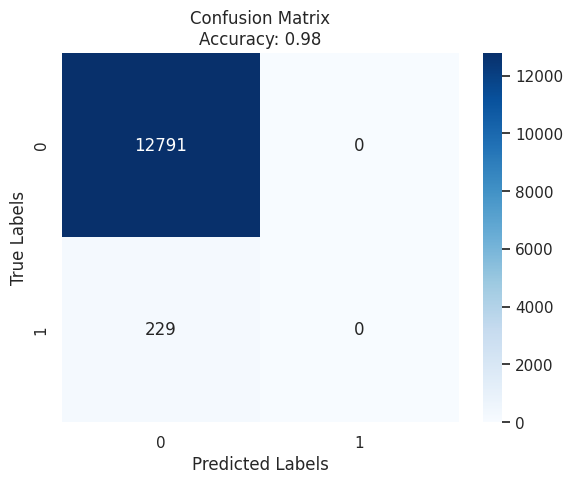

In [ ]:
# Plot confusion matrix as a heatmap
sns.heatmap(confusion_SVC, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix\nAccuracy: {acc_SVC:.2f}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**5.Random Forest**

**Train Test Split**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:

rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
pred1 = rf.predict(X_test)
rf.score(X_test,y_test)

0.9817204301075269

In [ ]:
acc_RF=accuracy_score(y_test,pred1)

In [ ]:
acc_RF

0.9817204301075269

In [ ]:
conf_RF=confusion_matrix(y_test,pred1)

In [ ]:
conf_RF

array([[12781,    10],
       [  228,     1]])

In [ ]:
classification_report(y_test,pred1)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99     12791\n           1       0.09      0.00      0.01       229\n\n    accuracy                           0.98     13020\n   macro avg       0.54      0.50      0.50     13020\nweighted avg       0.97      0.98      0.97     13020\n'

In [ ]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12791
           1       0.09      0.00      0.01       229

    accuracy                           0.98     13020
   macro avg       0.54      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020



**Predicting Result from Input Data**

In [ ]:
model = RandomForestClassifier()

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9817972350230415


In [ ]:
# Example input data for prediction
new_data = {
    52800,'Female',52,0,0,'Yes,Private','Urban',77.59,17.7,'formerly smoked'
}

In [ ]:
# Create a DataFrame for the new data
new_df = pd.DataFrame(new_data)

In [ ]:
if (predictions[0] == 0):
  print('This person is not Dead')
else :
    print('This person is Dead')

This person is not Dead


**6.KNN**

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.30)

**start with k=1.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[12549   237]
 [  218    16]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12786
           1       0.06      0.07      0.07       234

    accuracy                           0.97     13020
   macro avg       0.52      0.52      0.52     13020
weighted avg       0.97      0.97      0.97     13020



In [ ]:
knn.score(X_test,y_test)

0.9650537634408602

**Choosing a K Value**

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
error_rate

[0.03494623655913978,
 0.01881720430107527,
 0.019969278033794162,
 0.018125960061443933,
 0.01835637480798771,
 0.018125960061443933,
 0.018202764976958524,
 0.017972350230414748,
 0.01804915514592934,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748,
 0.017972350230414748]

Text(0, 0.5, 'Error Rate')

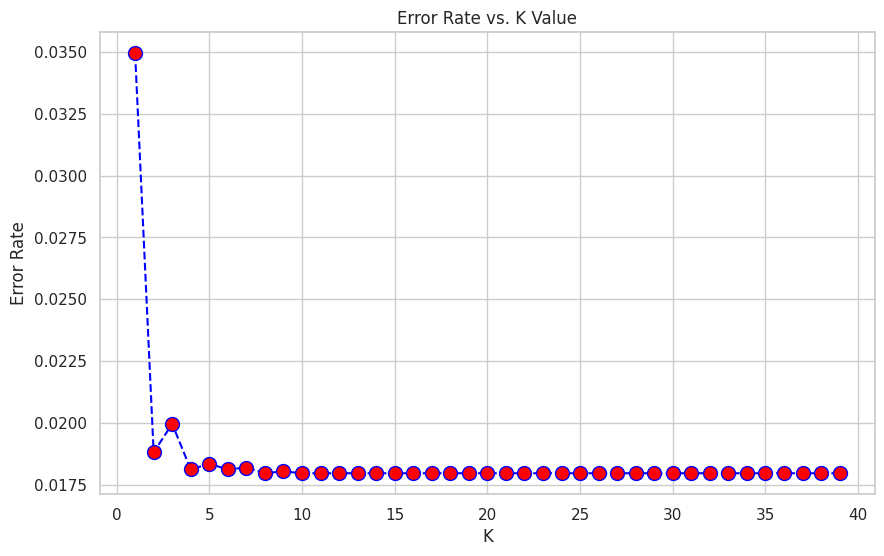

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITH K=1


[[12549   237]
 [  218    16]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12786
           1       0.06      0.07      0.07       234

    accuracy                           0.97     13020
   macro avg       0.52      0.52      0.52     13020
weighted avg       0.97      0.97      0.97     13020



In [ ]:
# NOW WITH K=30
knn2 = KNeighborsClassifier(n_neighbors=25)

knn2.fit(X_train,y_train)
pred = knn2.predict(X_test)

print('WITH K=23')
print('\n')
conf_KNN=(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23




              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12786
           1       0.00      0.00      0.00       234

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
conf_KNN

array([[12786,     0],
       [  234,     0]])

In [ ]:
acc_KNN=knn2.score(X_test,y_test)

In [ ]:
acc_KNN

0.9820276497695852

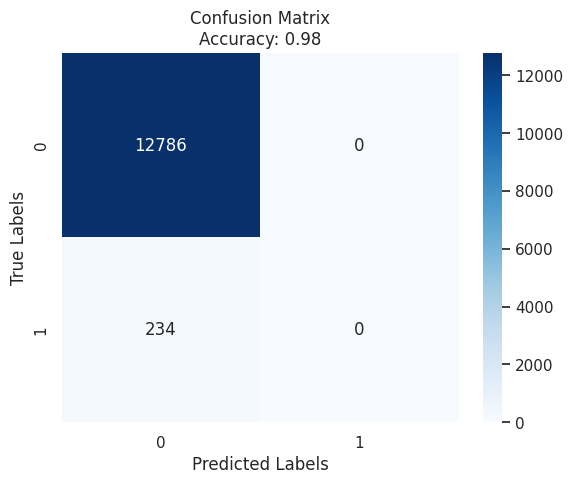

In [ ]:
# Plot confusion matrix as a heatmap
sns.heatmap(conf_KNN, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix\nAccuracy: {acc_KNN:.2f}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Comparision Table

In [ ]:
#| Model                     | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Macro Avg F1-Score | Weighted Avg F1-Score |
#|---------------------------|----------|----------------------|------------------|---------------------|--------------------|------------------------|
#| Logistic Regression       | 0.98     | 0.00                 | 0.00             | 0.00                | 0.50               | 0.97                   |
#| Gaussian Naive Bayes      | 0.94     | 0.07                 | 0.21             | 0.11                | 0.54               | 0.95                   |
#| Decision Tree             | 0.96     | 0.05                 | 0.06             | 0.05                | 0.52               | 0.96                   |
#| SVM (Support Vector Machine)| 0.98     | 0.00                 | 0.00             | 0.00                | 0.50               | 0.97                   |
#| Random Forest             | 0.98     | 0.20                 | 0.00             | 0.01                | 0.50               | 0.97                   |
#| KNN                       | 0.97     | 0.07                 | 0.07             | 0.07                | 0.53               | 0.97                   |


                          Model  Accuracy  Precision (Class 1)  \
0           Logistic Regression      0.98                 0.00   
1          Gaussian Naive Bayes      0.94                 0.07   
2                 Decision Tree      0.96                 0.05   
3  SVM (Support Vector Machine)      0.98                 0.00   
4                 Random Forest      0.98                 0.20   
5                           KNN      0.97                 0.07   

   Recall (Class 1)  F1-Score (Class 1)  Macro Avg F1-Score  \
0              0.00                0.00                0.50   
1              0.21                0.11                0.54   
2              0.06                0.05                0.52   
3              0.00                0.00                0.50   
4              0.00                0.01                0.50   
5              0.07                0.07                0.53   

   Weighted Avg F1-Score  
0                   0.97  
1                   0.95  
2             

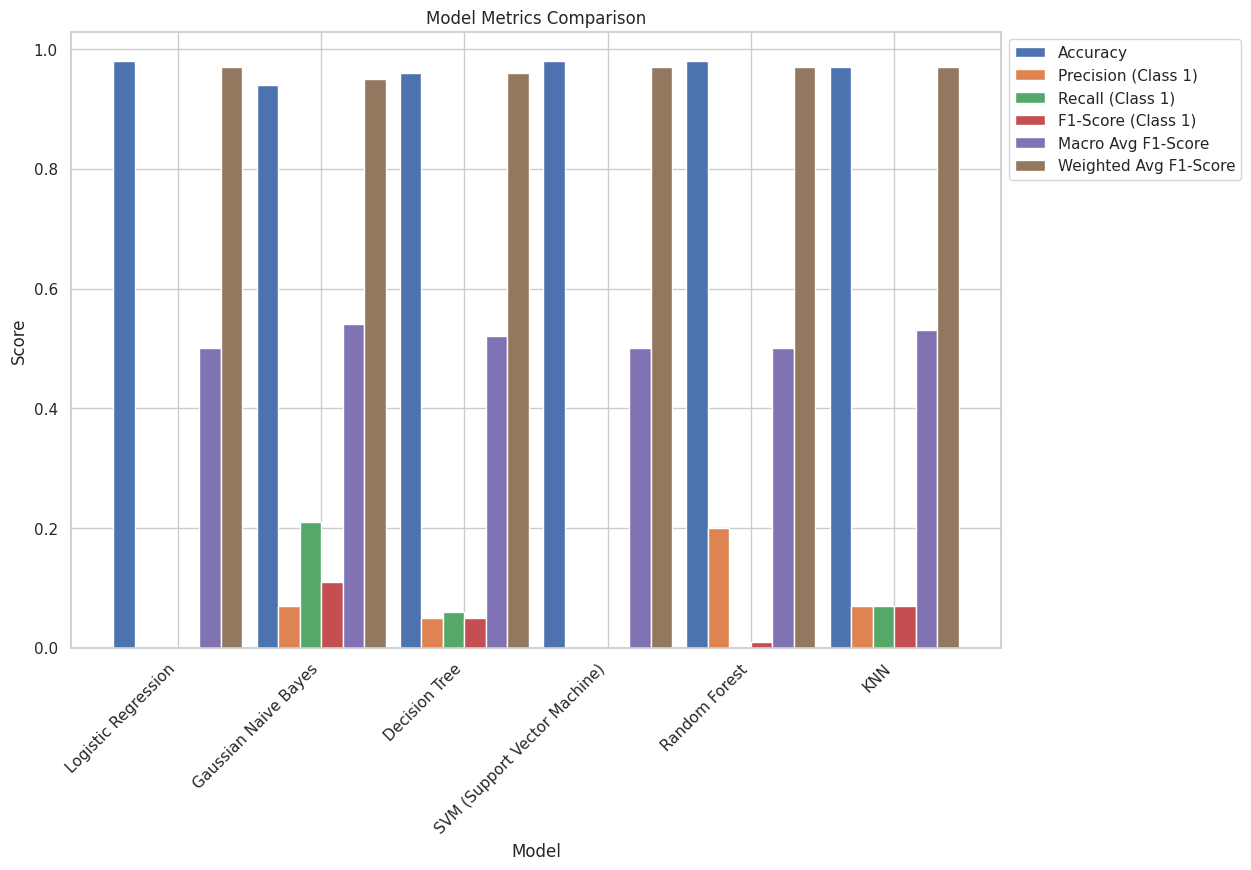

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
models = ['Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree', 'SVM (Support Vector Machine)', 'Random Forest', 'KNN']
accuracy = [0.98, 0.94, 0.96, 0.98, 0.98, 0.97]
precision_class1 = [0.00, 0.07, 0.05, 0.00, 0.20, 0.07]
recall_class1 = [0.00, 0.21, 0.06, 0.00, 0.00, 0.07]
f1_class1 = [0.00, 0.11, 0.05, 0.00, 0.01, 0.07]
macro_avg_f1 = [0.50, 0.54, 0.52, 0.50, 0.50, 0.53]
weighted_avg_f1 = [0.97, 0.95, 0.96, 0.97, 0.97, 0.97]

# Create a DataFrame
data = {
    'Model': models,
    'Accuracy': accuracy,
    'Precision (Class 1)': precision_class1,
    'Recall (Class 1)': recall_class1,
    'F1-Score (Class 1)': f1_class1,
    'Macro Avg F1-Score': macro_avg_f1,
    'Weighted Avg F1-Score': weighted_avg_f1
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

# Visualization - Grouped bar chart for multiple metrics
metrics = ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Macro Avg F1-Score', 'Weighted Avg F1-Score']
bar_width = 0.15
bar_positions = np.arange(len(models))

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.bar(bar_positions + i * bar_width, df[metric], width=bar_width, label=metric)

plt.title('Model Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(bar_positions + bar_width * (len(metrics) - 1) / 2, models, rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
